![GA Logo](https://raw.github.com/generalassembly/ga-ruby-on-rails-for-devs/master/images/ga.png)

## DSIR Instructor Code Challenge

### Welcome! 

> Please review the dataset and answer the questions provided.

### Instructions! 

1. Please create a jupyter notebook and save your code in a github gist. 
2. In your notebook, create two markdown headings: `#Part 1` & `#Part 2`. 
3. For each part, complete the following challenges. 

> Note: Please take *no more than 8 hours* to complete both of these challenges.

#### [Part 1: Modeling](https://gist.github.com/jeff-boykin/ec951ccaa1f90470b6ccc2bb1315d28a)
A challenge to evaluate your ability to perform standard data science tasks in Python.

#### [Part 2: Feedback](https://gist.github.com/jeff-boykin/e5d82e79a3de29813ff745496e6cb5c1)
A challenge to evaluate your ability to review & debug student code while providing them with relevant feedback.

## Next Steps

When you're finished, please submit a link to your Jupyter notebook using [nbviewer](http://nbviewer.jupyter.org) to render your gist. Afterward, one of our instructors or internal subject matter experts will review your submission and we'll follow up with you. Good luck!!


## Part 1

In [70]:
import pandas as pd
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [71]:
data = pd.read_csv("/Users/rowan/Desktop/breast-cancer.csv")
header = pd.read_table("/Users/rowan/Desktop/field_names.txt")
head_list = header.values.T.tolist()
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [72]:
data = data.rename(columns={'842302': 'patient', 'M': 'diagnosis', '17.99':'radius_mean', '10.38': 'radius_sd_eror',
    '122.8':'radius_worst','1001': 'texture_mean','0.1184':'texture_sd_error',
'0.2776': 'texture_sd_worst','0.3001': 'perimeter_mean', '0.1471': 'perimeter_sd_error', '0.2419':'perimeter_worst', 
'0.07871':'area_mean', '1.095':'area_sd_error',
'0.9053':'area_worst', '8.589':'smoothness_mean', '153.4':'smoothness_sd_error', 
'0.006399':'smoothness_worst', '0.04904':'compactness_mean','0.05373':'compactness_sd_error',
'0.01587':'compactness_worst', '0.03003':'concavity_mean', '0.006193':'concavity_sd_error',
    '25.38':'concavity_worst', '17.33':'concave_points_mean', '184.6':'concave_points_sd_error',
    '2019':'concave_points_worst', '0.1622':'symmetry_mean','0.6656':'symmetry_sd_error', 
    '0.7119':'symmetry_worst','0.2654':'fractal_dimension_mean', '0.4601':'fractal_dimension_sd_error',
       '0.1189':'fractal_dimension_worst'})

In [73]:
data.head()

,patient,diagnosis,radius_mean,radius_sd_eror,radius_worst,texture_mean,texture_sd_error,texture_sd_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [74]:
#EDA FUNCTION
def eda(dataframe): #Ritkas code chunk to check quality of data
    print "missing values \n", dataframe.isnull().sum() #shows total amount of null values for each column
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape     
    print "dataframe describe \n", dataframe.describe()
    print "dataframe length =", len(dataframe) #length of the dataframe
    print "duplicates", dataframe.duplicated().sum() # added this to duplicates in the data
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(data)

missing values 
patient                       0
diagnosis                     0
radius_mean                   0
radius_sd_eror                0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_sd_worst              0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_err

In [75]:
dummies = pd.get_dummies(data.diagnosis)
data = pd.concat([data, dummies], axis=1)
# data.head()
#commented out so I don't run this again

In [76]:
data.head()

,patient,diagnosis,radius_mean,radius_sd_eror,radius_worst,texture_mean,texture_sd_error,texture_sd_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,B,M
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0,1


In [77]:
benign = data[data.B == 1]
malignant = data[data.M == 1]
print "benign smoothness", benign.smoothness_mean.mean()
print "benign smoothness median", benign.smoothness_mean.median()
print "malignant smoothness", malignant.smoothness_mean.mean()
print "malignant smoothness median", malignant.smoothness_mean.median()
print "benign compactness", benign.compactness_mean.mean()
print "benign compactness median", benign.compactness_mean.median()
print "malignant compactness", malignant.compactness_mean.mean()
print "malignant compactness median", malignant.compactness_mean.median()


benign smoothness 2.00032128852
benign smoothness median 1.851
malignant smoothness 4.30371563981
malignant smoothness median 3.654
benign compactness 0.0214382464986
benign compactness median 0.01631
malignant compactness 0.0322017393365
malignant compactness median 0.02855


The malignant tumors have higher values for mean and median for smoothness and compactness. 
I used a groupby function to make dataframes with only the benign or only the malignant tumors. 

In [78]:
#making bootstrapped data
def bootstrap(sample, n=1000):
    x = []
    for i in range(1,n):
        y = np.random.choice(sample, len(sample), replace=True)
        x.append(y)
    return x

In [79]:
data.corr()

,patient,radius_mean,radius_sd_eror,radius_worst,texture_mean,texture_sd_error,texture_sd_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,B,M
patient,1.000000,0.075166,0.099288,0.073796,0.097390,-0.012343,0.001476,0.051507,0.045472,-0.021284,-0.051808,0.144884,-0.007764,0.139506,0.179768,0.096700,0.034564,0.055569,0.079077,-0.016849,0.026123,0.083457,0.064262,0.081329,0.108408,0.010899,-0.001891,0.024177,0.036300,-0.043371,-0.029157,-0.040370,0.040370
radius_mean,0.075166,1.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,-0.317749,0.678711,-0.096355,0.674190,0.735854,-0.222432,0.203984,0.193099,0.375435,-0.106777,-0.044473,0.969964,0.300440,0.966231,0.941537,0.117392,0.411329,0.525454,0.744025,0.159877,0.003339,-0.729376,0.729376
radius_sd_eror,0.099288,0.329383,1.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,0.080146,-0.068771,0.287615,0.385865,0.295219,0.271431,0.005855,0.197833,0.146559,0.166960,0.013387,0.058030,0.361964,0.912020,0.369573,0.353434,0.082714,0.290229,0.311122,0.306278,0.116263,0.127177,-0.422146,0.422146
radius_worst,0.073796,0.997876,0.335918,1.000000,0.986548,0.204505,0.555676,0.715662,0.851338,0.179100,-0.268103,0.690955,-0.085643,0.692689,0.744540,-0.202511,0.248532,0.226890,0.406473,-0.084416,-0.007568,0.969675,0.307013,0.971157,0.941735,0.148059,0.453304,0.562165,0.770783,0.184458,0.046909,-0.741887,0.741887
texture_mean,0.097390,0.987344,0.326193,0.986548,1.000000,0.174838,0.497981,0.686232,0.824246,0.148219,-0.288560,0.732879,-0.065375,0.727493,0.800829,-0.166555,0.210802,0.206677,0.371635,-0.074638,-0.021493,0.963319,0.290565,0.960440,0.959952,0.121543,0.388554,0.511392,0.722009,0.139856,0.000382,-0.708389,0.708389
texture_sd_error,-0.012343,0.168094,-0.017769,0.204505,0.174838,1.000000,0.657741,0.519002,0.551009,0.555259,0.582435,0.296856,0.070139,0.290958,0.241523,0.333703,0.316475,0.247046,0.379820,0.198262,0.281917,0.209018,0.039977,0.234093,0.202344,0.804667,0.469090,0.431727,0.500119,0.390161,0.496684,-0.356276,0.356276
texture_sd_worst,0.001476,0.505129,0.252038,0.555676,0.497981,0.657741,1.000000,0.881619,0.829050,0.598095,0.560161,0.490415,0.049963,0.541495,0.447968,0.137857,0.739278,0.572048,0.644837,0.225748,0.507276,0.531125,0.258877,0.585188,0.504612,0.564204,0.864097,0.815021,0.813810,0.502439,0.684961,-0.595587,0.595587
perimeter_mean,0.051507,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1.000000,0.920462,0.495525,0.329768,0.627609,0.079374,0.655856,0.612945,0.100190,0.669304,0.692510,0.684690,0.173926,0.448172,0.685826,0.308645,0.726703,0.673187,0.446155,0.751937,0.883184,0.859918,0.401782,0.510736,-0.695648,0.695648
perimeter_sd_error,0.045472,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,1.000000,0.457171,0.158464,0.694661,0.024143,0.707006,0.686826,0.028772,0.488058,0.438624,0.616413,0.090848,0.255168,0.829188,0.301004,0.854468,0.808120,0.450145,0.663532,0.750169,0.909272,0.368009,0.363277,-0.776369,0.776369
perimeter_worst,-0.021284,0.144236,0.080146,0.179100,0.148219,0.555259,0.598095,0.495525,0.457171,1.000000,0.475301,0.296561,0.130864,0.306324,0.216374,0.188984,0.418973,0.341438,0.392571,0.447109,0.329914,0.179703,0.096533,0.212084,0.170721,0.424045,0.467830,0.429023,0.425146,0.696745,0.434165,-0.327336,0.327336


(array([ 44.,  60.,  95.,  79.,  27.,  24.,  13.,   8.,   4.,   3.]),
 array([ 0.      ,  0.008534,  0.017068,  0.025602,  0.034136,  0.04267 ,
         0.051204,  0.059738,  0.068272,  0.076806,  0.08534 ]),
 <a list of 10 Patch objects>)

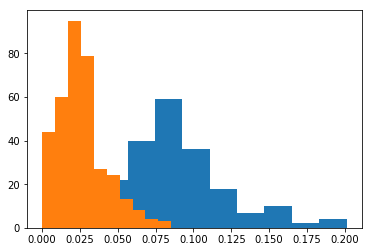

In [89]:
plt.hist(malignant.perimeter_sd_error)
plt.hist(benign.perimeter_sd_error)

(array([  5.,  18.,  40.,  48.,  92.,  63.,  53.,  23.,  13.,   2.]),
 array([  50.41 ,   58.079,   65.748,   73.417,   81.086,   88.755,
          96.424,  104.093,  111.762,  119.431,  127.1  ]),
 <a list of 10 Patch objects>)

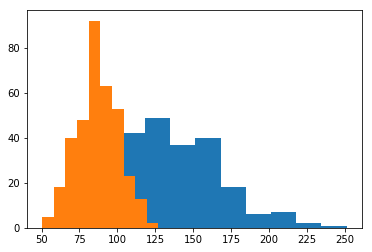

In [90]:
plt.hist(malignant.concave_points_sd_error)
plt.hist(benign.concave_points_sd_error)

(array([ 21.,  29.,  42.,  74.,  74.,  49.,  34.,  17.,  14.,   3.]),
 array([ 0.    ,  0.0175,  0.035 ,  0.0525,  0.07  ,  0.0875,  0.105 ,
         0.1225,  0.14  ,  0.1575,  0.175 ]),
 <a list of 10 Patch objects>)

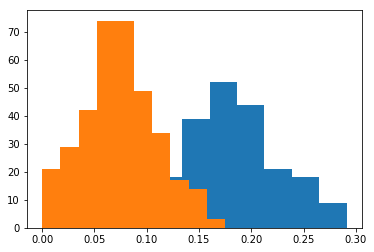

In [91]:
plt.hist(malignant.fractal_dimension_mean)
plt.hist(benign.fractal_dimension_mean)

These graphs show us that the means are significantly different between the malignant and begign tumors among these columns. The begign tumors are in orange and the malignant tumors are in blue. These 3 columns had the highest correlation with my dummy column M for malignant so I assumed they would be the best predictors. 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data[['perimeter_sd_error', 'concave_points_sd_error', 'fractal_dimension_mean']]
y = data.M

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print logreg.score(X_test,y_test)
#By not changing the threshold and setting a train-test split I am avoiding overfitting. 

0.920212765957


In [36]:
logreg.coef_

array([[ 1.05066948,  0.06355472,  1.82958802]])

In [37]:
from sklearn import svm
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc.score(X_test,y_test)
#By not altering all of the parameters in the SVC and setting a train-test split I am avoiding overfitting. 

0.93085106382978722

In [33]:
svc.coef_

array([[ 0.62912453,  0.0991342 ,  1.5502375 ]])

In both the SVM and the Logistic Regression model, the 'fractal_dimension_mean' was the most important feature as it had the highest coefficient. We can see that the coefficients did vary slightly between the models and the SVM with the linear kernel was able to perform slightly better than the linear regression. If given more time I would run gridsearch on the SVM to try to enhance some of the parameters that I used. Since the logistic regression performed well, I assumed that the linear kernel would be the best, although I would check that as well. As I was limited to choosing 2-3 variables in this analysis, I may have been able to capture more of the variance had I used more to make a better prediction. 

The factors that were most important in predicting whether or not a tumor was malignant or benign were 'fractal_dimension_mean', 'perimeter_sd_error', 'concave_points_sd_error'. These are all factors that doctors used to measure a tumor. As this is a binary classification problem (either someone has cancer or they don't), I thought a logistic regression would perform well, and it did. Logistic regression separates two classes based on a set threshold. In this case I just assumed .5 would be a good threshold. I was surprised to see that standard deviation for a metric performed better than mean for that same measurement, but it seems to generally be the case.

## Part 2

### Student 1

In [61]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

-11733.827883


/Users/rowan/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/rowan/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


This is a great start! When you imported linear regression, you forgot to include sklearn.linear_model so it didn't import correctly. The sklearn documentation is great so next time try a quick google search! I notice that you read in the data as d, but then called it data later on, try to remain consistent or your code won't run. You imported train_test_split but didn't wind up using it. Train_test_split ensures our results remain consistent. If you set cv=1, the code won't run and you're not actually cross validating. When I ran your code, I got a pretty bad number for my cross-val score, next time don't forget to fit your model. 

### Student 2

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

-11822.1402313


/Users/rowan/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/rowan/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/rowan/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/rowan/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Great job commenting! While you did a good job using cross_val, this pairs nicely with train_test_split so next time try adding one. I notice that you didn't fit your model. While cross_val still works without it, our results become pretty meaningless for future analysis. Next time try fitting your model as well. 